Prepare the environment
-----------------------

First we'll import various functions that we'll need for generating the report.

In [1]:
%matplotlib inline

from os.path import join, exists, expandvars
import pandas as pd
from skbio.draw import boxplots

from taxcompare.eval_framework import (get_expected_tables_lookup, 
                                       find_and_process_result_tables,
                                       compute_mock_results,
                                       compute_mantel,
                                       generate_pr_scatter_plots,
                                       boxplot_from_data_frame,
                                       heatmap_from_data_frame,
                                       method_by_dataset_a1,
                                       method_by_dataset_a2,
                                       performance_rank_comparisons,
                                       parameter_comparisons)

Configure local environment-specific values
-------------------------------------------

**This is the only cell that you will need to edit to generate reports locally.** After editing this cell, you can run all cells in this notebook to generate your analysis report. Some of the analyses make take a few minutes to run, and analyses at more specific taxonomic levels (e.g., genus or species) will be slower than analyses at more general taxonomic levels (e.g., phylum, class). 

**This cell will not run until you fill in a taxonomic level (``2`` through ``7``).**

In [2]:
## project_dir should be the directory where you've downloaded (or cloned) the 
## short-read-tax-assignment repository. 
project_dir = expandvars("$HOME/data/short-read-tax-assignment")

precomputed_results_dir = expandvars("$HOME/data/short-read-tax-assignment/data/precomputed-results/")
expected_results_dir = join(precomputed_results_dir, "simulated-community")

## results_dirs should contain the directory or directories where
## results can be found. By default, this is just the precomputed 
## results included with the project. If other results should be included, 
## absolute paths to those directories should be added to this list.
results_dirs = \
 [precomputed_results_dir,
  expandvars("$HOME/data/2015.06.24-tax-parameter-sweep-simulated")
  ]

    
new_param_ids = {'mothur':['confidence']}
## Taxonomic level at which analyses should be performed. Edit this to
## the desired taxonomic level. 
# 2: phylum, 3: class, 4: order, 5: family, 6: genus, 7: species
taxonomic_level = 7

## Reference choice (must be partial-ref or full-ref)
reference_choice = "partial-ref"

## Minimum number of times an OTU must be observed for it to be included in analyses. Edit this
## to analyze the effect of the minimum count on taxonomic results.
min_count = 1

# set to true if select tables should be written as Excel files (useful for publication)
write_xls_files = False

In [3]:
# Define the subdirectories where the data should be, and confirm that they exist.
simulated_results_dirs = [join(results_dir,"simulated-community") for results_dir in results_dirs]

for simulated_results_dir in simulated_results_dirs:
    assert exists(simulated_results_dir), "Simulated community result directory doesn't exist: %s" % simulated_results_dir

Find pre-computed tables, expected tables, and "query" tables
-------------------------------------------------------------

Next we'll use the paths defined above to find all of the tables that will be compared. These include the *pre-computed result* tables (i.e., the ones that the new methods will be compared to), the *expected result* tables (i.e., the tables containing the known composition of the mock microbial communities), and the *query result* tables (i.e., the tables generated with the new method(s) that we want to compare to the *pre-computed result* tables).

In [4]:
results = []
for simulated_results_dir in simulated_results_dirs:
    results += find_and_process_result_tables(simulated_results_dir)

In [ ]:
# Uncomment for test runs (looks at a small subset of the data)

# from random import shuffle
# shuffle(results)
# results = results[:10]

In [30]:
result_fp = join(precomputed_results_dir,'simulated-community', 'level%d-results-w-mothur.csv') % taxonomic_level

if exists(result_fp):
    simulated_results = pd.DataFrame.from_csv(result_fp)
else:
    expected_tables = get_expected_tables_lookup(expected_results_dir, level=taxonomic_level)
    simulated_results = compute_mock_results(results, expected_tables, taxonomy_level=taxonomic_level, min_count=min_count, new_param_ids=new_param_ids)
    simulated_results.to_csv(result_fp)

In [31]:
refernece_choice_v = [e.endswith(reference_choice) for e in simulated_results['Parameters']]
simulated_results = simulated_results[refernece_choice_v]

Evalution 1: Compute and summarize precision, recall, and F-measure
-------------------------------------------------------------------

In this evaluation, we compute and summarize precision, recall, and F-measure of each result (pre-computed and query) based on the known composition of the simulated communities. We then summarize the results in two ways: first with boxplots, and second with a table of the top methods based on their F-measures.

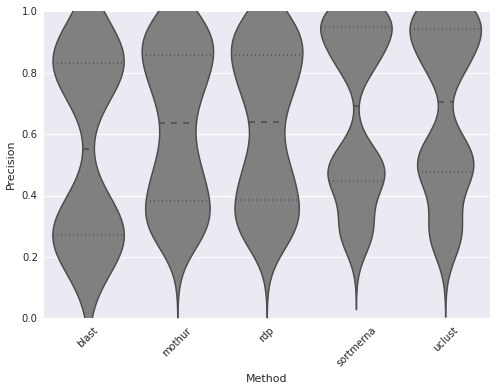

In [32]:
boxplot_from_data_frame(simulated_results, group_by="Method", metric="Precision")

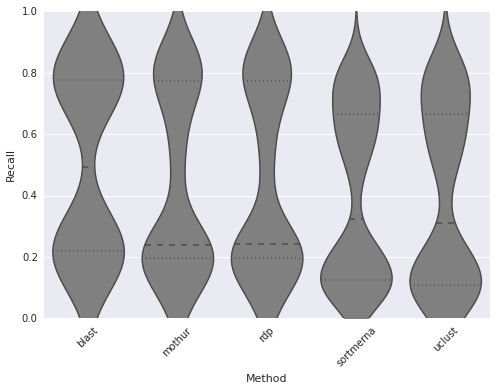

In [33]:
boxplot_from_data_frame(simulated_results, group_by="Method", metric="Recall")

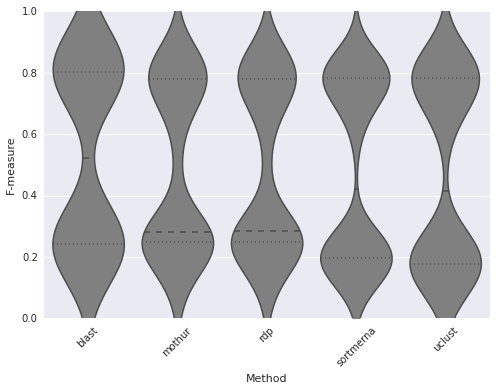

In [34]:
boxplot_from_data_frame(simulated_results, group_by="Method", metric="F-measure")

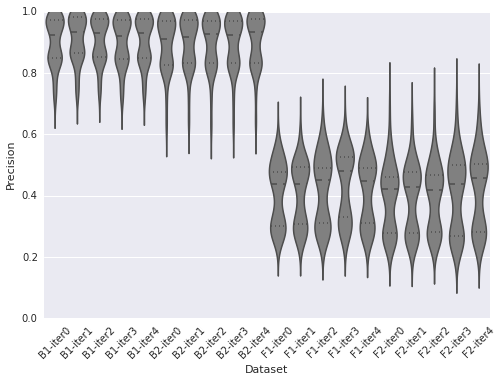

In [35]:
boxplot_from_data_frame(simulated_results, group_by="Dataset", metric="Precision")

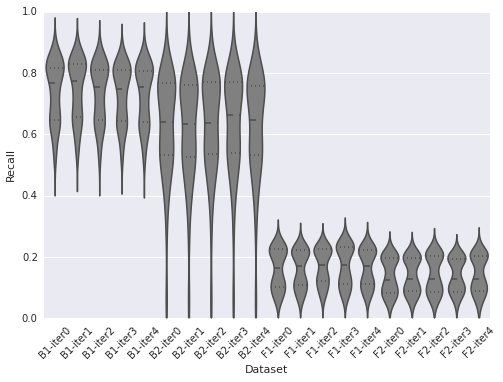

In [36]:
boxplot_from_data_frame(simulated_results, group_by="Dataset", metric="Recall")

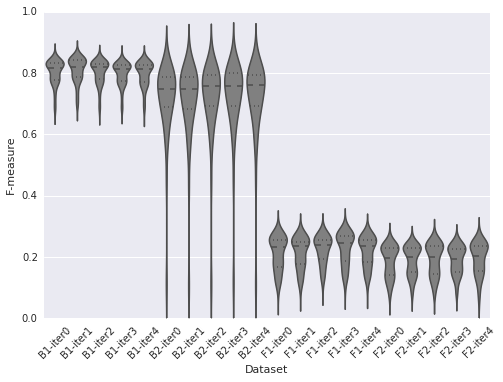

In [37]:
boxplot_from_data_frame(simulated_results, group_by="Dataset", metric="F-measure")

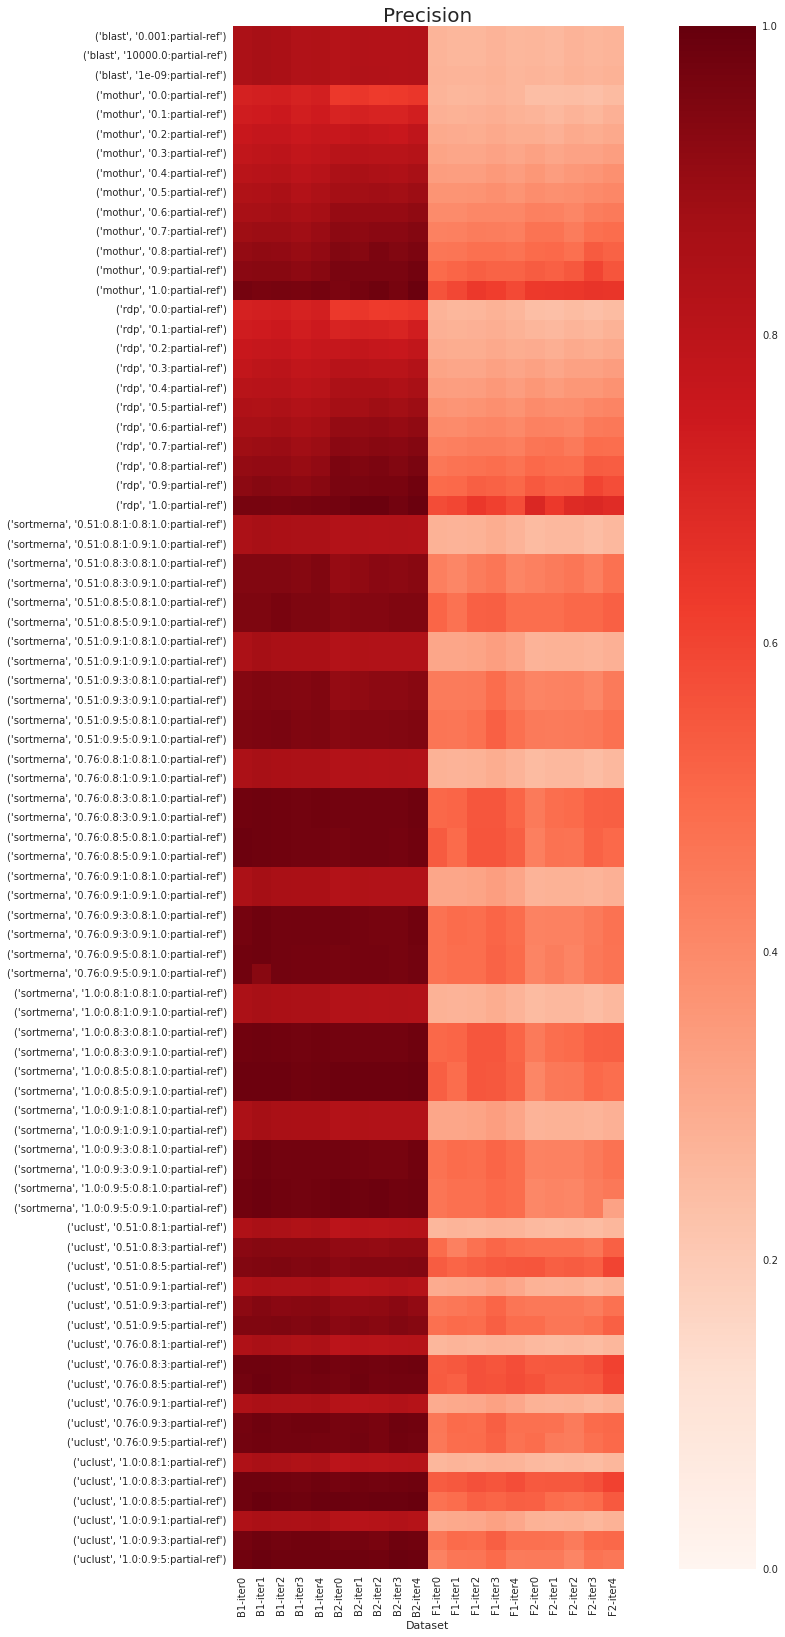

In [38]:
heatmap_from_data_frame(simulated_results, "Precision")

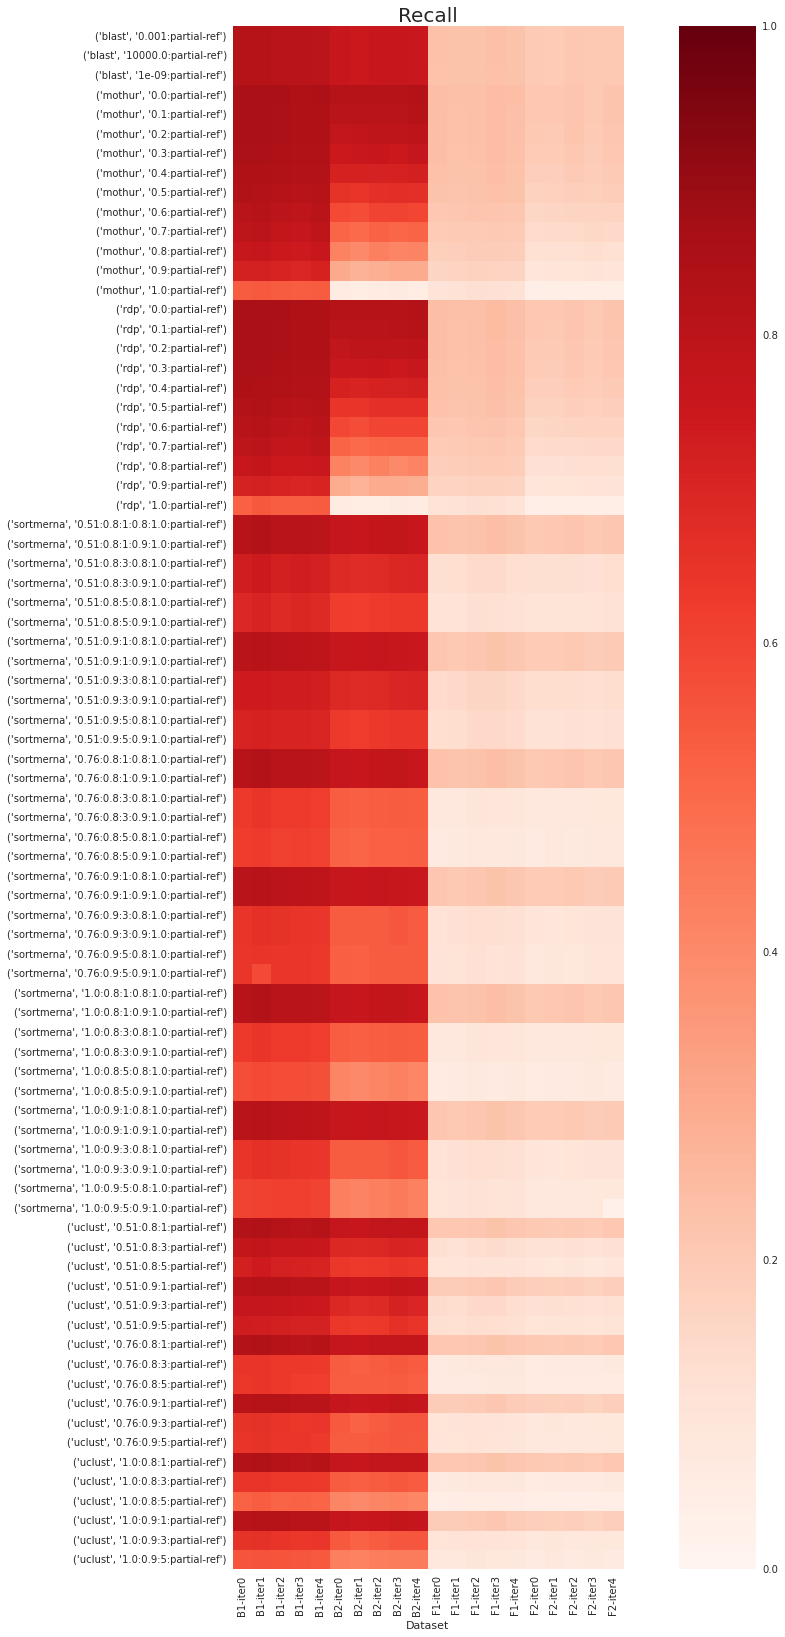

In [39]:
heatmap_from_data_frame(simulated_results, "Recall")

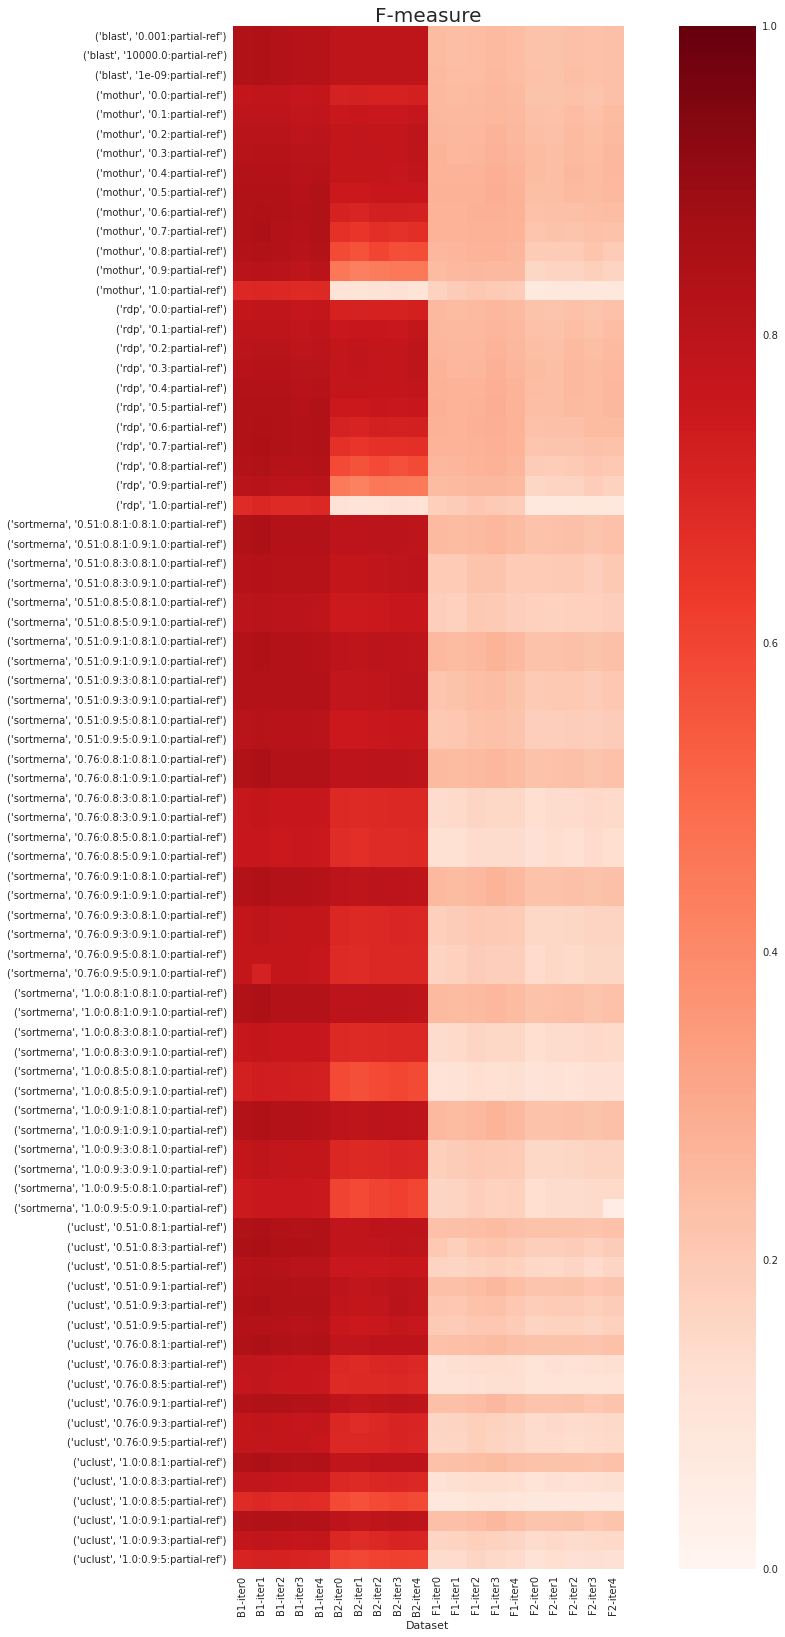

In [40]:
heatmap_from_data_frame(simulated_results, "F-measure")

In [41]:
method_by_dataset_a1(simulated_results, 'B1-iter0')

Method  Precision    Recall  F-measure
241      uclust   0.927517  0.775969   0.845002
229         rdp   0.863609  0.814149   0.838150
2759     mothur   0.884303  0.793936   0.836686
213       blast   0.848573  0.818080   0.833047
192   sortmerna   0.848803  0.816395   0.832284

In [42]:
method_by_dataset_a1(simulated_results, 'B2-iter0')

Method  Precision    Recall  F-measure
2040  sortmerna   0.825359  0.771812   0.797688
2154     uclust   0.823600  0.772931   0.797461
2117      blast   0.823351  0.761186   0.791049
2137        rdp   0.815106  0.754474   0.783619
3069     mothur   0.810990  0.751119   0.779907

In [43]:
method_by_dataset_a1(simulated_results, 'F1-iter0')

Method  Precision    Recall  F-measure
1987        rdp   0.372781  0.228025   0.282964
3033     mothur   0.370653  0.225957   0.280758
1946  sortmerna   0.315267  0.213547   0.254624
1980      blast   0.276226  0.230093   0.251058
2030     uclust   0.299598  0.192865   0.234665

In [44]:
method_by_dataset_a1(simulated_results, 'F2-iter0')

Method  Precision    Recall  F-measure
2915     mothur   0.331866  0.197176   0.247375
1185        rdp   0.329247  0.196653   0.246234
1164      blast   0.273305  0.202406   0.232572
1122  sortmerna   0.277242  0.195607   0.229377
1223     uclust   0.257596  0.203975   0.227671

## Evaluation 2: Rank-based statistics comparing the performance of the optimal parameter setting run for each method on each data set.

*Count best* column indicates how many samples a given method achieved the best result or tied for the best result (which is why they sum to more than the total number of samples).

### Within-method comparisons of parameter performance

In [45]:
rdp_top_params = parameter_comparisons(simulated_results, "rdp", metrics=['Precision', 'Recall', 'F-measure'])
rdp_top_params[:15]

F-measure  Precision  Recall      Mean
0.0:partial-ref          0          0      20  6.666667
1.0:partial-ref          0         20       0  6.666667
0.3:partial-ref          6          0       0  2.000000
0.5:partial-ref          5          0       0  1.666667
0.6:partial-ref          4          0       0  1.333333
0.4:partial-ref          3          0       0  1.000000
0.7:partial-ref          2          0       0  0.666667
0.1:partial-ref          0          0       1  0.333333

In [46]:
uclust_top_params = parameter_comparisons(simulated_results, "uclust", metrics=['Precision', 'Recall', 'F-measure'])
uclust_top_params[:15]

F-measure  Precision  Recall      Mean
0.51:0.8:1:partial-ref          8          0      19  9.000000
0.76:0.8:1:partial-ref          8          0      19  9.000000
1.0:0.8:1:partial-ref           8          0      19  9.000000
1.0:0.8:5:partial-ref           0          8       0  2.666667
0.51:0.9:1:partial-ref          6          0       1  2.333333
0.76:0.9:1:partial-ref          6          0       1  2.333333
1.0:0.9:1:partial-ref           6          0       1  2.333333
0.51:0.8:3:partial-ref          5          0       0  1.666667
0.76:0.8:3:partial-ref          0          5       0  1.666667
0.76:0.8:5:partial-ref          0          5       0  1.666667
1.0:0.8:3:partial-ref           0          5       0  1.666667
1.0:0.9:5:partial-ref           0          2       0  0.666667
0.51:0.9:3:partial-ref          1          0       0  0.333333

In [47]:
sortmerna_top_params = parameter_comparisons(simulated_results, "sortmerna", metrics=['Precision', 'Recall', 'F-measure'])
sortmerna_top_params[:15]

F-measure  Precision  Recall       Mean
0.51:0.8:1:0.8:1.0:partial-ref         10          0      20  10.000000
1.0:0.8:1:0.8:1.0:partial-ref          10          0      20  10.000000
0.76:0.8:1:0.8:1.0:partial-ref         10          0      20  10.000000
0.76:0.8:1:0.9:1.0:partial-ref         10          0      20  10.000000
1.0:0.8:1:0.9:1.0:partial-ref          10          0      20  10.000000
0.51:0.8:1:0.9:1.0:partial-ref         10          0      20  10.000000
1.0:0.9:1:0.9:1.0:partial-ref           9          0       0   3.000000
1.0:0.9:1:0.8:1.0:partial-ref           9          0       0   3.000000
0.51:0.9:1:0.8:1.0:partial-ref          9          0       0   3.000000
0.51:0.9:1:0.9:1.0:partial-ref          9          0       0   3.000000
1.0:0.8:5:0.9:1.0:partial-ref           0          9       0   3.000000
1.0:0.8:5:0.8:1.0:partial-ref           0          9       0   3.000000
0.76:0.9:1:0.8:1.0:partial-ref          9          0       0   3.000000
0.76:0.9:1:0.9:1.0:partial-ref          9          0       0   3.000000
1.0:0.8:3:0.9:1.0:partial-ref           0          4       0   1.333333

In [48]:
blast_top_params = parameter_comparisons(simulated_results, "blast", metrics=['Precision', 'Recall', 'F-measure'])
blast_top_params[:15]

F-measure  Precision  Recall  Mean
1e-09:partial-ref           19         20      12    17
0.001:partial-ref            7          6      20    11
10000.0:partial-ref          7          6      20    11

In [49]:
mothur_top_params = parameter_comparisons(simulated_results, "mothur", metrics=['Precision', 'Recall', 'F-measure'])
mothur_top_params[:15]

F-measure  Precision  Recall      Mean
0.0:partial-ref          0          0      20  6.666667
1.0:partial-ref          0         19       0  6.333333
0.3:partial-ref          6          0       0  2.000000
0.5:partial-ref          5          0       0  1.666667
0.1:partial-ref          0          0       3  1.000000
0.4:partial-ref          3          0       0  1.000000
0.6:partial-ref          3          0       0  1.000000
0.7:partial-ref          3          0       0  1.000000
0.9:partial-ref          0          1       0  0.333333

### Between-method performance comparisons based on best parameter set determined above

In [50]:
mp_combs = {"rdp": rdp_top_params.index[0],
            "blast": blast_top_params.index[0], 
            "sortmerna": sortmerna_top_params.index[0],
            "uclust": uclust_top_params.index[0],
            "mothur": mothur_top_params.index[0]}

In [51]:
metric = 'Precision'
df = performance_rank_comparisons(simulated_results, metric, mp_combs)
if write_xls_files: 
    df.to_excel('tables/level%d_%s_rankstats.xlsx' % (taxonomic_level, metric), 
                                      na_rep='NA', float_format="%1.3f")
df

Count best  sortmerna: wilcoxon stat  sortmerna: wilcoxon p  \
sortmerna          15                       NaN                    NaN   
blast               5                        86               0.478125   
mothur              0                         0               0.000089   
rdp                 0                         0               0.000089   
uclust              0                        15               0.000780   

           blast: wilcoxon stat  blast: wilcoxon p  mothur: wilcoxon stat  \
sortmerna                    86           0.478125                      0   
blast                       NaN                NaN                      0   
mothur                        0           0.000089                    NaN   
rdp                           0           0.000089                     98   
uclust                       19           0.001325                      7   

           mothur: wilcoxon p  rdp: wilcoxon stat  rdp: wilcoxon p  \
sortmerna            0.000089                   0         0.000089   
blast                0.000089                   0         0.000089   
mothur                    NaN                  98         0.793839   
rdp                  0.793839                 NaN              NaN   
uclust               0.000254                  10         0.000390   

           uclust: wilcoxon stat  uclust: wilcoxon p  
sortmerna                     15            0.000780  
blast                         19            0.001325  
mothur                         7            0.000254  
rdp                           10            0.000390  
uclust                       NaN                 NaN

In [52]:
metric = 'Recall'
df = performance_rank_comparisons(simulated_results, metric, mp_combs)
if write_xls_files: 
    df.to_excel('tables/level%d_%s_rankstats.xlsx' % (taxonomic_level, metric), 
                                      na_rep='NA', float_format="%1.3f")
df

Count best  mothur: wilcoxon stat  mothur: wilcoxon p  \
mothur             13                    NaN                 NaN   
rdp                11                     47            0.460302   
sortmerna           1                      1            0.000103   
blast               0                      0            0.000089   
uclust              0                      0            0.000089   

           rdp: wilcoxon stat  rdp: wilcoxon p  sortmerna: wilcoxon stat  \
mothur                     47         0.460302                         1   
rdp                       NaN              NaN                         2   
sortmerna                   2         0.000120                       NaN   
blast                       0         0.000089                        16   
uclust                      0         0.000089                        82   

           sortmerna: wilcoxon p  blast: wilcoxon stat  blast: wilcoxon p  \
mothur                  0.000103                     0           0.000089   
rdp                     0.000120                     0           0.000089   
sortmerna                    NaN                    16           0.001477   
blast                   0.001477                   NaN                NaN   
uclust                  0.390533                    80           0.350656   

           uclust: wilcoxon stat  uclust: wilcoxon p  
mothur                         0            0.000089  
rdp                            0            0.000089  
sortmerna                     82            0.390533  
blast                         80            0.350656  
uclust                       NaN                 NaN

In [53]:
metric = 'F-measure'
df = performance_rank_comparisons(simulated_results, metric, mp_combs)
if write_xls_files: 
    df.to_excel('tables/level%d_%s_rankstats.xlsx' % (taxonomic_level, metric), 
                                      na_rep='NA', float_format="%1.3f")
df

Count best  sortmerna: wilcoxon stat  sortmerna: wilcoxon p  \
sortmerna           8                       NaN                    NaN   
blast               4                        47               0.030365   
uclust              4                        37               0.011129   
rdp                 3                        21               0.001713   
mothur              1                        22               0.001944   

           blast: wilcoxon stat  blast: wilcoxon p  uclust: wilcoxon stat  \
sortmerna                    47           0.030365                     37   
blast                       NaN                NaN                     72   
uclust                       72           0.217957                    NaN   
rdp                          24           0.002495                     45   
mothur                       25           0.002821                     47   

           uclust: wilcoxon p  rdp: wilcoxon stat  rdp: wilcoxon p  \
sortmerna            0.011129                  21         0.001713   
blast                0.217957                  24         0.002495   
uclust                    NaN                  45         0.025094   
rdp                  0.025094                 NaN              NaN   
mothur               0.030365                  82         0.390533   

           mothur: wilcoxon stat  mothur: wilcoxon p  
sortmerna                     22            0.001944  
blast                         25            0.002821  
uclust                        47            0.030365  
rdp                           82            0.390533  
mothur                       NaN                 NaN